In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

In [2]:
import plt_conf as conf
conf.general()  # cargando configuración general

In [3]:
# cargando datos

ell_val = [2, 3, 4, 5, 6]
J_Real = [[2], [2, 3], range(1, 8), range(1, 10), [1,2,3,4,5,6,7,8,9,11]]

datos = []
k = 0
for ell in ell_val:
    temp = []
    for J in J_Real[k]:
        name = 'data_l%d_J%d.dat'%(ell, J)
        Jval, Real, Imag = np.loadtxt(name, unpack=True)
        temp.append([Jval, Real, Imag])
        
    datos.append(temp)
    k += 1


In [4]:
# cargando datos con nodos

ell_val2 = [0, 1, 2, 3, 4, 5]
J_Real2 = [[0,2], range(4), range(5), range(7), range(9), range(11)]

datos2 = []
k = 0
for ell in ell_val2:
    temp = []
    for J in J_Real2[k]:
        name = 'Nod_1_data_l%d_J%d.dat'%(ell, J)
        Jval, Real, Imag = np.loadtxt(name, unpack=True)
        temp.append([Jval, Real, Imag])
        
    datos2.append(temp)
    k += 1

In [5]:
J_Val = np.arange(15)
datos_Plot = []
for i_dat in datos:
    temp = np.zeros(15)
    for j_dat in i_dat:
        ind = J_Val==j_dat[0][0]  # toma el valor de J
        tot = sum(j_dat[1]>1e-04)  # calcula los valores reales mayores a cero
        temp[ind] = tot
    
    datos_Plot.append(temp)
    
    
J_Val2 = np.arange(15)
datos_Plot2 = []
for i_dat in datos2:
    temp = np.zeros(15)
    for j_dat in i_dat:
        ind = J_Val2==j_dat[0][0]  # toma el valor de J
        tot = sum(j_dat[1]>1e-04)  # calcula los valores reales mayores a cero
        temp[ind] = tot
    
    datos_Plot2.append(temp)

In [5]:
datos2[4][2][1]>1e-04, datos2[4][2][1]

(array([False, False, False, False, False, False,  True,  True,  True,
         True]),
 array([-6.82416450e-03, -3.17552245e-03, -3.17552245e-03, -1.94542488e-03,
        -1.87907086e-06,  1.87907086e-06,  1.94542488e-03,  3.17552245e-03,
         3.17552245e-03,  6.82416450e-03]))

In [6]:
# Añadiendo el ell=0, 1
k = 1
for _ in range(2):
    datos_Plot.insert(0, np.zeros(15))
    ell_val.insert(0, k)
    k -= 1

In [7]:
# datos_Plot

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_70765/1534058252.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),


Text(1.65, 1.7, '$\\lambda\\in \\mathbb{R}$')

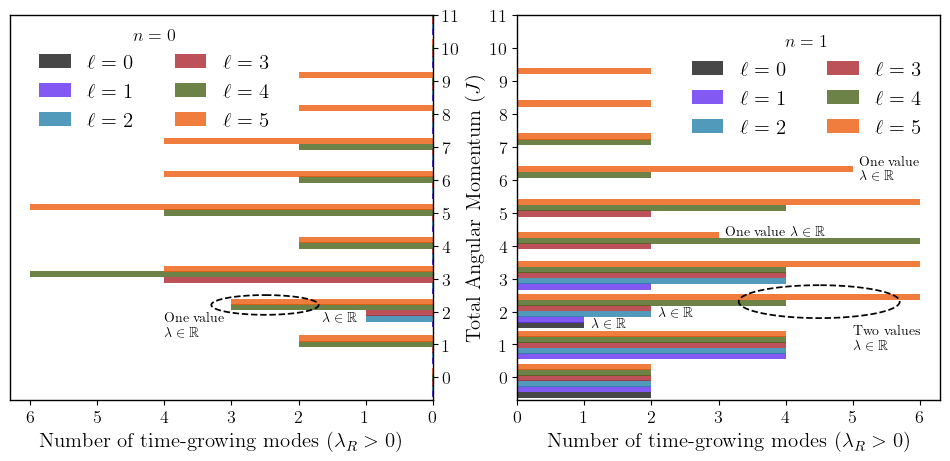

In [7]:
marker_op = ['o', 'v', 's', '*']
col = ['#1a1919', '#6330f0', '#2681ab', '#ab262f', '#486318', '#ed5b0c', 
      '#f0a092', '#484f07', '#694d0c']  #, '#bc92e0''#f0784d'

Ls = ['-', '--', ':', '.-']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.),
                       sharex=False, sharey=False,
                      gridspec_kw=dict(hspace=0.0, wspace=.2))

J_Val = np.arange(15)-0.5
k = 0
for i in datos_Plot[:-1]:
    J_Val[2:4] = J_Val[2:4]+0.12 if k==0 else J_Val[2:4]        
    J_Val = J_Val+0.17 if sum(i)!=0 else J_Val
    ind = i==0
    indata = np.copy(i)
    indata[ind] = 0.01
    ax[0].barh(J_Val, indata, height=0.19, ls='-',
               lw=0.25, label=r'$\ell=%d$'%ell_val[k],
               color=col[ell_val[k]], align='center',
              alpha=0.8)
    k += 1

J_Val = np.arange(15)-0.7
k = 0
for i in datos_Plot2:
    J_Val[2:4] = J_Val[2:4]+0.12 if k==0 else J_Val[2:4]        
    J_Val = J_Val+0.17 if sum(i)!=0 else J_Val
    ind = i==0
    indata = np.copy(i)
    indata[ind] = 0.01
    ax[1].barh(J_Val, indata, height=0.19, ls='-',
               lw=0.25, label=r'$\ell=%d$'%ell_val[k],
               color=col[ell_val[k]], align='center',
              alpha=0.8)
    k += 1
    
ax[0].set_yticks(range(15))
ax[0].set_ylim(-0.7, 11)

ax[0].set_ylabel(r'Total Angular Momentum $(J)$', ) # labelpad=17
ax[0].set_xlabel(r'Number of time-growing modes ($\lambda_{R}>0$)')  # Num. of $\lambda_R > 0$

ax[1].set_xlabel(r'Number of time-growing modes ($\lambda_{R}>0$)')  # Num. of $\lambda_R > 0$
ax[1].legend(frameon=False, title=r'$n=1$', ncol=2)
ax[1].set_yticks(range(15))
ax[1].set_ylim(-0.7, 11)

ax[0].invert_xaxis()
ax[0].yaxis.set_label_position("right")
ax[0].yaxis.tick_right()

ax[0].legend(loc=(0.05, 0.68), frameon=False, title=r'$n=0$', ncol=2)

####################
u = 2.5       #x-position of the center
v = 2.2      #y-position of the center
a = 0.3       #radius on the x-axis
b = 0.8     #radius on the y-axis
t_rot=np.pi/2 #rotation angle

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)], [np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2, Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

ax[0].plot( u+Ell_rot[0,:], v+Ell_rot[1,:], ls='--', lw=1.25, color='black')    #rotated ellipse
#######
####
u = 4.5      #x-position of the center
v = 2.3      #y-position of the center
a = 0.5       #radius on the x-axis
b = 1.2    #radius on the y-axis
t_rot=np.pi/2 #rotation angle

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)], [np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2, Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

ax[1].plot( u+Ell_rot[0,:], v+Ell_rot[1,:], ls='--', lw=1.25, color='black')    #rotated ellipse
######

ax[1].text(s=r'$\lambda\in \mathbb{R}$', x=2.1, y=1.85, fontsize=10)
ax[1].text(s=r'$\lambda\in \mathbb{R}$', x=1.1, y=1.5, fontsize=10)
ax[1].text(s=r'One value $\lambda\in \mathbb{R}$', x=3.1, y=4.3, fontsize=10)
ax[1].text(s='Two values \n $\lambda\in \mathbb{R}$', x=5., y=0.85, fontsize=10)
ax[1].text(s='One value \n $\lambda\in \mathbb{R}$', x=5.1, y=6., fontsize=10)

ax[0].text(s='One value \n $\lambda\in \mathbb{R}$', x=4., y=1.25, fontsize=10)
ax[0].text(s=r'$\lambda\in \mathbb{R}$', x=1.65, y=1.7, fontsize=10)



In [8]:
fig.savefig('Modos.pdf', format='pdf', metadata=None, # dpi='figure',
        pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None, dpi=1000, 
        bbox_inches='tight'# Plot will be occupy a maximum of available space # bbox_inches=None,
       )